# Lab: Classification with Decision Trees

**Objectives of the practical work:**

1. Learn how to build decision trees with scikit-learn  
2. Be familiar with some parameters and visualization tools
3. Use a real-case dataset (COMPASS ) as an example
4. Evaluate diverse trees in terms of training and testing accuracies with different parameters
5. Study the impact of some parameters on the sensitivity aspect




## PART 1: Basic steps 

The following are basic instructions to start with decision trees. You need to execute them one by one to understand the basic steps for learning decision trees. Once you get familiar with the different steps, you will be working on the compass dataset. 

The decision tree package that we use is from scikit-learn. The full documentation of decision trees are available at https://scikit-learn.org/stable/modules/tree.html

Take a moment to briefly consult the documentation.

We need first to include some libraries: 




In [3]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

The following is a basic example for binary classification



In [4]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]

# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]

We construct a decision tree using the default parameters:

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Now we can ask the decision tree to predict the outcome for unknown examples. 
For instance we can ask a prediction for the three examples:

In [6]:
clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])

array([1, 1, 0])

The result is an array of the 3 predicted labels (one for each example): `array([0, 1, 0])`

## PART 2 : Visualization 

There are many ways to visualize a decision tree. The first one is very basic:



In [7]:
text_representation = tree.export_text(clf)
print(text_representation)



|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1



We can use a more readable and visual way as follows:

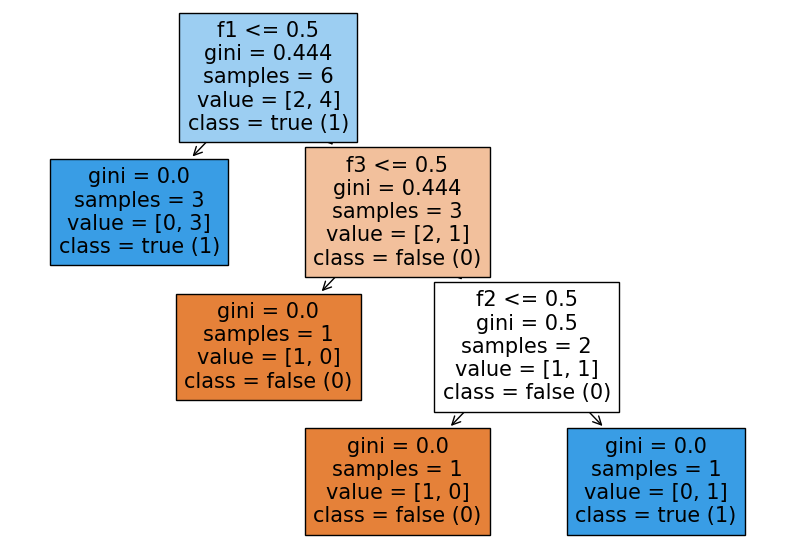

In [8]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf, 
                    feature_names= ("f1","f2" , "f3", "f4"),
                    class_names= ("false (0)", "true (1)" ), 
                    filled=True)


Where:
- `figsize` restrains the size of the plot,
- `feature_names` gives the names of the different features,
- `class_names` corresponds to human readable labels for each class,
- `filled` is a boolean indicating a preference to show a colorful tree. 


**Tasks:**
- Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation. 




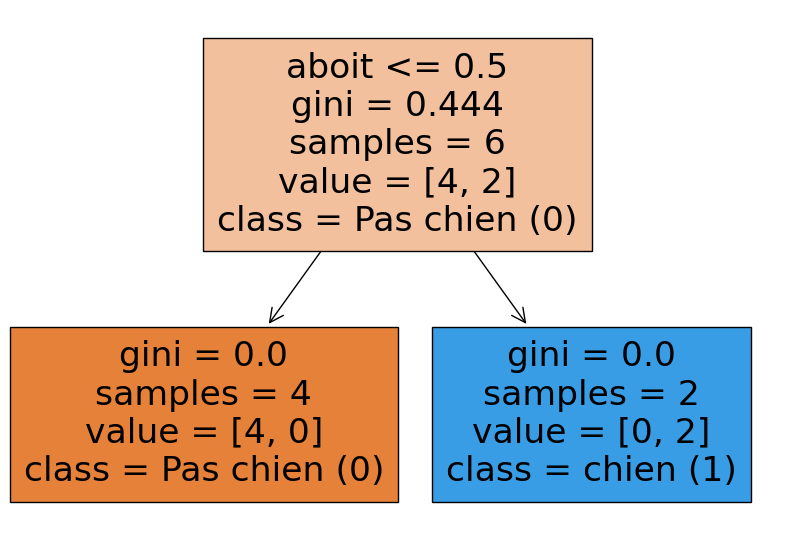

In [9]:
X_new = []

# Features: 4 pattes, 2 yeux, 1 queue, mammifere, male, femelle, aboit
lapin = [1,1,1,1,1,0,0]
chien = [1,1,1,1,1,0,1]
caillou = [0,0,0,0,0,0,0]
serpent = [0,1,0,0,0,1,0]
rat = [1,1,1,0,1,0,0]
chienne = [1,1,1,1,0,1,1]

X_new.append(lapin)
X_new.append(chien)
X_new.append(caillou)
X_new.append(serpent)
X_new.append(rat)
X_new.append(chienne)

Y_new = [0,1,0,0,0,1]

clfChien = tree.DecisionTreeClassifier()
clfChien = clf.fit(X_new, Y_new)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clfChien, 
                    feature_names= ("4 pattes","2 yeux" , "1 queue", "mammifere", "male", "femelle", "aboit"),
                    class_names= ("Pas chien (0)", "chien (1)" ), 
                    filled=True)




## PART 3: The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend


Have a look at the original non-binary dataset ([https://www.kaggle.com/danofer/compass](https://www.kaggle.com/danofer/compass)) to understand the different features. Consider in particular the data used for fairness: propublicaCompassRecividism_data_fairml.csv


**Understanding the dataset:**

Take a moment to think about the following questions 

- What are the features? 
- How many examples in the dataset?
- What are your expectations regarding the most important features? 
- Propose (informally) a way to reduce the dataset
- There many ways to binarize the dataset. How do you propose to do so?



Below, we use a binarized version of the dataset that is used in the FairCORELS library (https://github.com/ferryjul/fairCORELS) as well some of its tools. 

You need first to download the dataset and the tools file and put them in your work directory:

- The dataset compass.csv
- The set of tools utils.py

Load the binary dataset `compass.csv` as follows 

In [10]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")



In [11]:
# Understanding the dataset
print("Features: ", features)

# How many examples in the dataset?
print("Number of examples: ", len(train_examples))

# What are your expectations regarding the most important features?
# Recidiveness


# Propose a way to reduce the dataset (informally)
# Remove the features that are not relevant to the prediction such as different IDs, names, etc.

# There many ways to binarize the dataset. How do you propose to do so?

Features:  ['race_African-American', 'race_Caucasian', 'gender_Female', 'gender_Male', 'age_18-20', 'age_21-22', 'age_23-25', 'age_26-45', 'age_>45', 'juvenile-felonies_=0', 'juvenile-felonies_>0', 'juvenile-misdemeanors_=0', 'juvenile-misdemeanors_>0', 'juvenile-crimes_=0', 'juvenile-crimes_>0', 'priors_0', 'priors_1', 'priors_2-3', 'priors_>3', 'charge_degree_Misdemeanor', 'charge_degree_Felony', 'not_gender_Female', 'not_gender_Male', 'not_age_18-20', 'not_age_21-22', 'not_age_23-25', 'not_age_26-45', 'not_age_>45', 'not_juvenile-felonies_=0', 'not_juvenile-felonies_>0', 'not_juvenile-misdemeanors_=0', 'not_juvenile-misdemeanors_>0', 'not_juvenile-crimes_=0', 'not_juvenile-crimes_>0', 'not_priors_0', 'not_priors_1', 'not_priors_2-3', 'not_priors_>3', 'not_charge_degree_Misdemeanor', 'not_charge_degree_Felony', 'juvenile-misdemeanors_=0__AND__juvenile-felonies_=0', 'gender_Male__AND__juvenile-felonies_=0', 'gender_Male__AND__juvenile-misdemeanors_=0', 'gender_Male__AND__juvenile-crim

Inspect each of these 4 objects. What do they represent? How many features? examples? 

In [12]:
print(train_examples)
print(len(train_examples))
print(train_labels)
print(len(train_labels))
print(features)
print(len(features))
print(prediction)
print(len(prediction))

[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
5273
[1 0 0 ... 1 0 1]
5273
['race_African-American', 'race_Caucasian', 'gender_Female', 'gender_Male', 'age_18-20', 'age_21-22', 'age_23-25', 'age_26-45', 'age_>45', 'juvenile-felonies_=0', 'juvenile-felonies_>0', 'juvenile-misdemeanors_=0', 'juvenile-misdemeanors_>0', 'juvenile-crimes_=0', 'juvenile-crimes_>0', 'priors_0', 'priors_1', 'priors_2-3', 'priors_>3', 'charge_degree_Misdemeanor', 'charge_degree_Felony', 'not_gender_Female', 'not_gender_Male', 'not_age_18-20', 'not_age_21-22', 'not_age_23-25', 'not_age_26-45', 'not_age_>45', 'not_juvenile-felonies_=0', 'not_juvenile-felonies_>0', 'not_juvenile-misdemeanors_=0', 'not_juvenile-misdemeanors_>0', 'not_juvenile-crimes_=0', 'not_juvenile-crimes_>0', 'not_priors_0', 'not_priors_1', 'not_priors_2-3', 'not_priors_>3', 'not_charge_degree_Misdemeanor', 'not_charge_degree_Felony', 'juvenile-misdemeanors_=0__AND__juveni

In [13]:
# Example 1
print(train_examples[0])
print(train_labels[0])
print(features[0])
print(prediction[0])

[1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
1
race_African-American
t



Have a look at the different parameters of the `DecisionTreeClassifier` class constructor. We will be studying three parameters: 

- splitter
- max_depth 
- min_samples_leaf 

What do they represent? 


**Tasks:**

- 1:  Build severals decision trees (different parameters) and visualize them
- 2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*.
- 3: Do again the evaluation using 5-cross-validation
- 4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 
- 5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
- 6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.

In [14]:
# 2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test multiple times.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_examples, train_labels, test_size=0.2, random_state=1)

splitter_params = ['best', 'random']
max_depth_params = [None,1,5,7,10,20,50,80]
min_samples_leaf = [5,10,20,50,75]

models=[]

results = []
for s in splitter_params:
    for md in max_depth_params:
        for ms in min_samples_leaf:
            dtc = tree.DecisionTreeClassifier(splitter=s, max_depth=md, min_samples_leaf=ms)
            dtc = dtc.fit(X_train, y_train)
            score = dtc.score(X_test, y_test)
            params = {'splitter' : s, 'max_depth' : md, 'min_samples' : ms, 'score': score}
            results.append(params)
            models.append(dtc)

# print(results)




In [15]:
import pandas as pd
import numpy as np

table = pd.DataFrame.from_dict(results)
table = table.replace(np.nan, '-')
table = table.sort_values(by='score', ascending=False)
table

splitter max_depth  min_samples     score
12     best       5.0           20  0.686256
22     best      10.0           20  0.686256
13     best       5.0           50  0.686256
62   random      10.0           20  0.686256
52   random       5.0           20  0.686256
..      ...       ...          ...       ...
48   random       1.0           50  0.647393
47   random       1.0           20  0.647393
46   random       1.0           10  0.647393
9      best       1.0           75  0.647393
8      best       1.0           50  0.647393

[80 rows x 4 columns]

In [16]:
# Use 5 cross-validation'
from sklearn.model_selection import cross_val_score

data_cv = []

for model in models:
    scores = cross_val_score(model,train_examples,train_labels,cv=5)
    avg = np.average(scores)
    params = {'splitter' : model.splitter, 'max_depth' : model.max_depth, 'min_samples' : model.min_samples_leaf, 'cv5-avg' : avg, 'model' : model}
    data_cv.append(params)

table = pd.DataFrame.from_dict(data_cv )
table = table.replace(np.nan, '-')
table = table.sort_values(by='cv5-avg', ascending=False)
table

splitter max_depth  min_samples   cv5-avg  \
28     best      20.0           50  0.666415   
63   random      10.0           50  0.666225   
73   random      50.0           50  0.666225   
3      best         -           50  0.666225   
78   random      80.0           50  0.666225   
..      ...       ...          ...       ...   
5      best       1.0            5  0.635123   
6      best       1.0           10  0.635123   
47   random       1.0           20  0.635123   
8      best       1.0           50  0.635123   
9      best       1.0           75  0.635123   

                                                model  
28  DecisionTreeClassifier(max_depth=20, min_sampl...  
63  DecisionTreeClassifier(max_depth=10, min_sampl...  
73  DecisionTreeClassifier(max_depth=50, min_sampl...  
3         DecisionTreeClassifier(min_samples_leaf=50)  
78  DecisionTreeClassifier(max_depth=80, min_sampl...  
..                                                ...  
5   DecisionTreeClassifier(max_depth=1, min_sample...  
6   DecisionTreeClassifier(max_depth=1, min_sample...  
47  DecisionTreeClassifier(max_depth=1, min_sample...  
8   DecisionTreeClassifier(max_depth=1, min_sample...  
9   DecisionTreeClassifier(max_depth=1, min_sample...  

[80 rows x 5 columns]

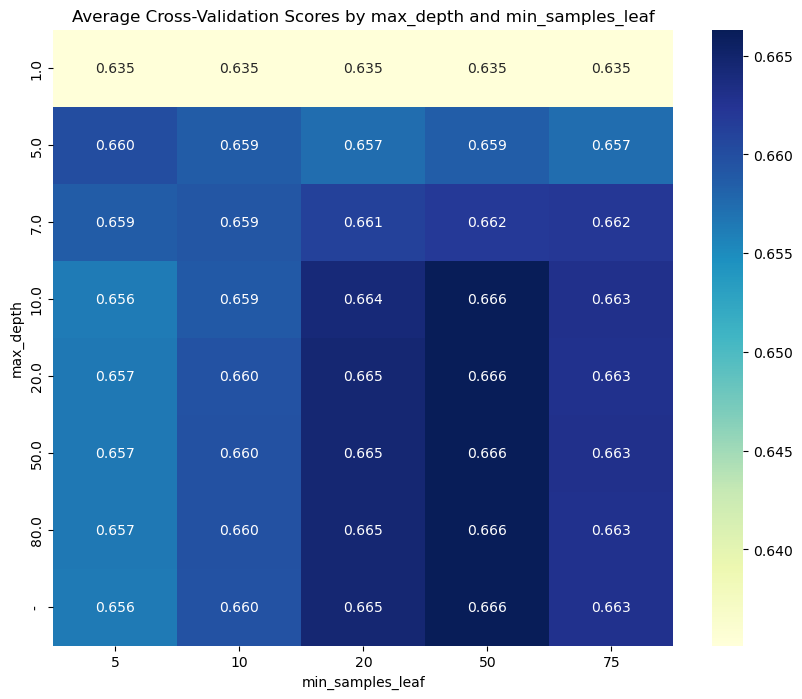

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the table DataFrame to a pivot table for visualization
pivot_table = table.pivot_table(index='max_depth', columns='min_samples', values='cv5-avg')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Average Cross-Validation Scores by max_depth and min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('max_depth')
plt.show()

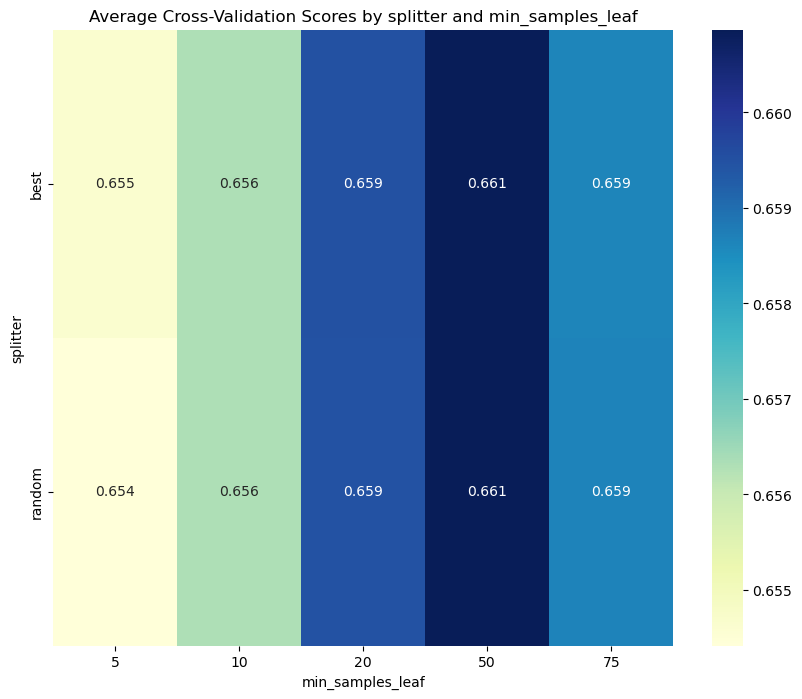

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the table DataFrame to a pivot table for visualization
pivot_table = table.pivot_table(index='splitter', columns='min_samples', values='cv5-avg')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Average Cross-Validation Scores by splitter and min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('splitter')
plt.show()

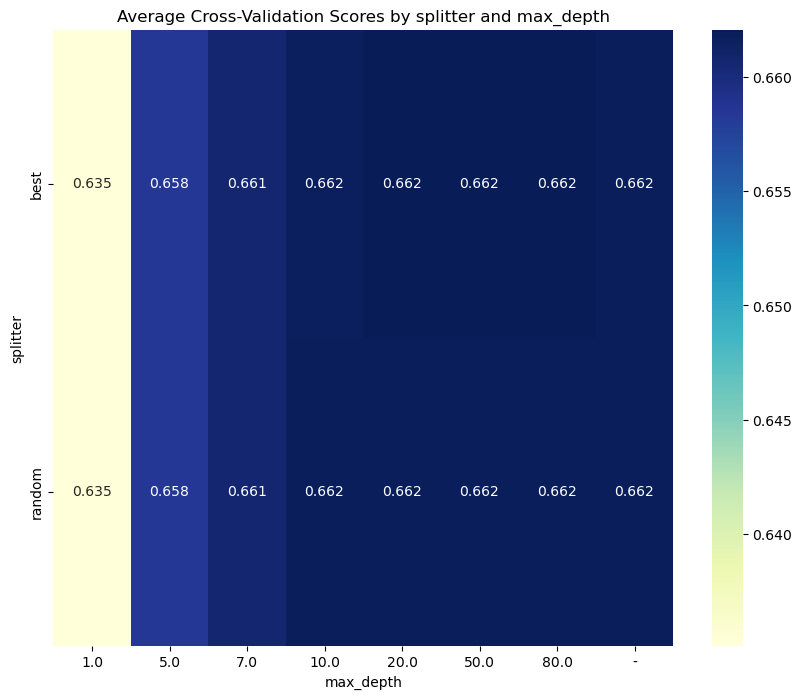

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the table DataFrame to a pivot table for visualization
pivot_table = table.pivot_table(index='splitter', columns='max_depth', values='cv5-avg')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".3f")
plt.title('Average Cross-Validation Scores by splitter and max_depth')
plt.xlabel('max_depth')
plt.ylabel('splitter')
plt.show()

Confusion matrix for model 1:
[[416 126]
 [224 289]]

Confusion matrix for model 2:
[[423 119]
 [229 284]]

Confusion matrix for model 3:
[[423 119]
 [213 300]]

Confusion matrix for model 4:
[[417 125]
 [208 305]]

Confusion matrix for model 5:
[[417 125]
 [218 295]]

Confusion matrix for model 6:
[[454  88]
 [284 229]]

Confusion matrix for model 7:
[[454  88]
 [284 229]]

Confusion matrix for model 8:
[[454  88]
 [284 229]]

Confusion matrix for model 9:
[[454  88]
 [284 229]]

Confusion matrix for model 10:
[[454  88]
 [284 229]]

Confusion matrix for model 11:
[[440 102]
 [231 282]]

Confusion matrix for model 12:
[[441 101]
 [232 281]]

Confusion matrix for model 13:
[[439 103]
 [228 285]]

Confusion matrix for model 14:
[[439 103]
 [228 285]]

Confusion matrix for model 15:
[[418 124]
 [216 297]]

Confusion matrix for model 16:
[[422 120]
 [219 294]]

Confusion matrix for model 17:
[[423 119]
 [220 293]]

Confusion matrix for model 18:
[[424 118]
 [217 296]]

Confusion matrix fo

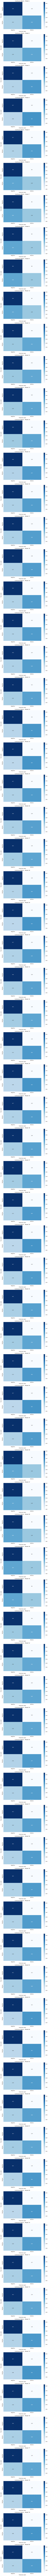

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for each model
confusion_matrices = []
for model in models:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Analyze confusion matrices
for i, cm in enumerate(confusion_matrices):
    print(f"Confusion matrix for model {i+1}:\n{cm}\n")


# Set up subplots for each confusion matrix
num_models = len(models)
fig, axes = plt.subplots(nrows=num_models, ncols=1, figsize=(8, 5*num_models))

# Plot confusion matrix for each model
for i, (model, cm) in enumerate(zip(models, confusion_matrices)):
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix - Model {i+1}")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.xaxis.set_ticklabels(['Negative', 'Positive'])
    ax.yaxis.set_ticklabels(['Negative', 'Positive'])
    plt.tight_layout()

plt.show()


In [55]:
# Get the best model
best_model = table.iloc[0].model

number_of_features = len(train_examples[0])  # Assuming train_examples is your dataset

# Define the number of samples to generate
num_samples = 100

# Generate synthetic data for "homme sombre"
synthetic_hommes_sombres = []

for _ in range(num_samples):
    # Assuming homme sombre features: [1, 0, ...] (first two features)
    # Generate random values for other features
    homme_sombre_features = [1, 0]  # First two features for homme sombre
    # Generate random values for remaining features (assuming binary features)
    remaining_features = np.random.randint(0, 2, size=number_of_features - 2)
    homme_sombre_features.extend(remaining_features)
    synthetic_hommes_sombres.append(homme_sombre_features)

# Convert synthetic data to numpy array
synthetic_hommes_sombres = np.array(synthetic_hommes_sombres)

# Make predictions for original "hommes sombres"
original_predictions = best_model.predict(synthetic_hommes_sombres)

# Modify features for each group of "hommes sombres" and make predictions
synthetic_non_hommes_sombres = []
for index in hommes_sombres_indices:
    modified_features = train_examples[index].copy()
    modified_features[0] = 0  # Change first column to 0
    modified_features[1] = 1  # Change second column to 1
    synthetic_non_hommes_sombres.append(modified_features)

# Assuming train_examples is a numpy array
train_examples_dtype = train_examples.dtype

# Convert arrays in synthetic_non_hommes_sombres to match the data type of train_examples
synthetic_non_hommes_sombres = [sample.astype(train_examples_dtype) for sample in synthetic_non_hommes_sombres]


modified_predictions = best_model.predict(synthetic_non_hommes_sombres)

print(synthetic_hommes_sombres)
print(synthetic_non_hommes_sombres)
print(np.mean(original_predictions- modified_predictions))



[[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 1 ... 1 1 1]
 [1 0 0 ... 0 1 0]
 [1 0 1 ... 1 0 1]]
[array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8), array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0,

ValueError: operands could not be broadcast together with shapes (100,) (3172,) 

In [56]:
print(original_predictions)
print(modified_predictions)

[1 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0
 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1]
[1 1 1 ... 0 1 0]


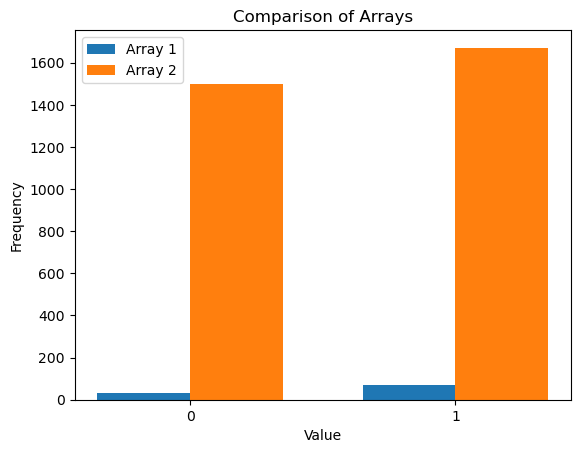

In [57]:
# Count occurrences of 0 and 1 in each array
array1_counts = np.bincount(original_predictions)
array2_counts = np.bincount(modified_predictions)

# # Count occurrences of 0 and 1 in each array
# array1_counts = [np.sum(original_predictions == 0), np.sum(original_predictions == 1)]
# array2_counts = [np.sum(modified_predictions == 0), np.sum(array2 == 1)]

# Plot histogram
width = 0.35  # Width of bars
plt.bar(np.arange(2), array1_counts, width, label='Array 1')
plt.bar(np.arange(2) + width, array2_counts, width, label='Array 2')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Comparison of Arrays')
plt.xticks(np.arange(2) + width / 2, ['0', '1'])  # Set x-axis ticks at midpoints between bars
plt.legend()

# Show plot
plt.show()